In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
# Load the data
df = pd.read_csv('Iris.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [5]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
print(Y_Data)
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

[5.006     5.9360003 6.5880003 3.418     2.7700002 2.974     1.4640001
 4.26      5.552     0.244     1.3260001 2.026    ]


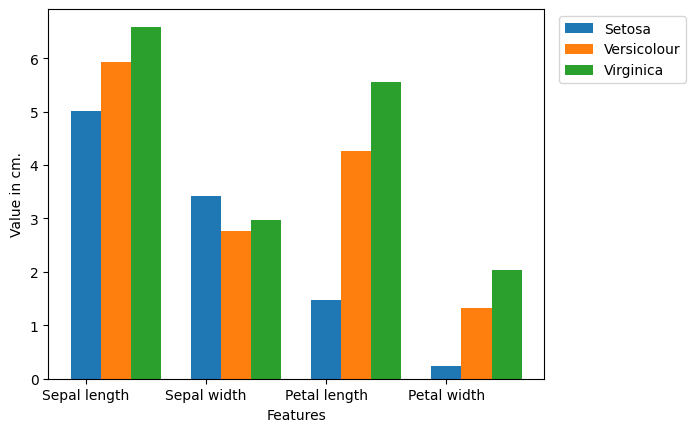

In [6]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [7]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [9]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [10]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
